In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import edhec_risk_kit as erk


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
hfi = erk.get_hfi_returns()

In [4]:
hfi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


In [5]:
hfi = hfi['2000':]

In [7]:
erk.var_gaussian(hfi, level=1)['Distressed Securities']

0.03143017693928047

In [8]:
erk.var_gaussian(hfi, level=1,modified=True)['Distressed Securities']

0.04966909110627918

In [10]:
erk.var_historic(hfi, level=1)['Distressed Securities']

0.042642

# Question 4
Load the 30 industry return data using the erk.get_ind_returns() function that we developed during the lab sessions. For purposes of the remaining questions, use data during the 5 year period 2013-2017 (both inclusive)

Estimate the expected returns as well as the covariance matrix.

To be able to respond to the questions, you will need to build the MSR, EW and GMV portfolios 
consisting of the “Books”, “Steel”, "Oil", and "Mines" industries. 

Assume the risk free rate over the 5 year period is 10%.



In [16]:
riskfree_rate = 1.1**(1/5)-1
riskfree_rate

0.019244876491456564

In [28]:
ind =  erk.get_ind_returns()
er = erk.annualize_rets(ind["2013":"2017"],12)
cov = ind["2013":"2017"].cov()
l=['Books','Steel','Oil','Mines']
erk.msr(0.1, er[l], cov.loc[l,l])

array([0.00000000e+00, 1.00000000e+00, 6.00214323e-16, 7.35522754e-16])

In [29]:
erk.msr(riskfree_rate, er[l], cov.loc[l,l])

array([7.03211705e-01, 2.96788295e-01, 2.49800181e-16, 2.63677968e-16])

In [42]:
erk.msr(0.1, er[l], cov.loc[l,l])

array([0.00000000e+00, 1.00000000e+00, 6.00214323e-16, 7.35522754e-16])

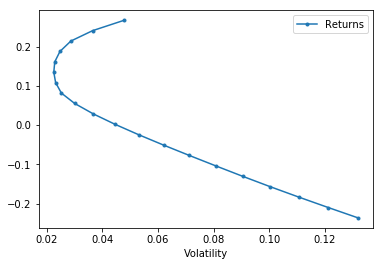

In [30]:
erk.plot_ef(20,er,cov)

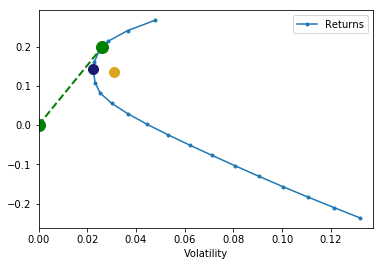

In [31]:
erk.plot_ef(20,er,cov,show_cml=True,show_ew=True,show_gmv=True)

In [52]:
erk.gmv(cov)

array([4.77024865e-01, 4.33680869e-19, 4.34112030e-01, 8.88631048e-02])

# Question 11
Assume two different investors invested in the GMV and MSR portfolios at the start of 2018 using the weights we just computed. Compute the annualized volatility of these two portfolios over the next 12 months of 2018?

(Hint: Use the portfolio_vol code we developed in the lab and use ind[“2018”][l].cov() to compute the covariance matrix for 2018, assuming that the variable ind holds the industry returns and the variable l holds the list of industry portfolios you are willing to hold. Don’t forget to annualize the volatility)

What would be the annualized volatility over 2018 using the weights of the MSR portfolio?

Enter the answer in percent. e.g. for 5.32% enter 5.32
1 point

In [32]:
ind =  erk.get_ind_returns()
l=['Books','Steel','Oil','Mines']
cov = ind['2018'][l].cov() 

In [33]:
ind['2018'][l]

,Books,Steel,Oil,Mines
2018-01,0.0449,0.0361,0.0286,0.0357
2018-02,-0.0325,-0.0199,-0.1102,-0.0335
2018-03,0.0031,-0.0586,0.0308,-0.0015
2018-04,-0.0062,0.0366,0.1030,-0.0339
2018-05,-0.0061,0.0562,0.0343,0.0308
2018-06,0.0218,-0.0514,0.0052,-0.0178
2018-07,-0.0417,0.0424,0.0104,-0.0224
2018-08,-0.0447,-0.0323,-0.0295,-0.1075
2018-09,-0.0221,-0.0067,0.0356,-0.0173
2018-10,-0.0666,-0.1161,-0.1206,-0.1032


In [40]:
ind =  erk.get_ind_returns()
l=['Books','Steel','Oil','Mines']
cov = ind["2013":"2017"][l].cov()
w_gmv = erk.gmv(cov)

cov_2018 = ind['2018'][l].cov() 
vol_gmv = erk.portfolio_vol(w_gmv,cov_2018)
vol_gmv*np.sqrt(12)

0.18973734554913554

In [41]:
ind =  erk.get_ind_returns()
l=['Books','Steel','Oil','Mines']
er = erk.annualize_rets(ind["2013":"2017"][l], 12)
cov = ind["2013":"2017"][l].cov()
rf_rate = 0.1
w_msr = erk.msr(rf_rate, er, cov)

cov_2018 = ind['2018'][l].cov() 
vol_msr = erk.portfolio_vol(w_msr,cov_2018)
vol_msr*np.sqrt(12)

0.21983988181484201